In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nbformat
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [4]:
df.shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [6]:
df.describe(include='float')

,height,age,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000
mean,181.240353,26.041903,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881
std,6.969818,4.777629,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.000000,22.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000
50%,181.240353,26.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000
75%,186.000000,29.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000
max,206.000000,43.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000


In [7]:
df.describe(include='int')

,appearance,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,36.407011,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,26.526541,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,12.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,35.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,59.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,107.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [8]:
df.describe(include='object')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/alexander-badolato/profil/spieler/957230,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [9]:
df.groupby(['name', 'team'])[['name', 'team']].count()

,,name,team
name,team,,
AJ Marcucci,New York Red Bulls,1,1
Aaron Appindangoyé,Sivasspor,1,1
Aaron Boupendza,Al-Shabab Club (Riyadh),1,1
Aaron Calver,Gwangju FC,1,1
Aaron Connolly,Hull City,1,1
...,...,...,...
Ömer Beyaz,VfB Stuttgart,1,1
Ömer Toprak,Antalyaspor,1,1
Örjan Nyland,RB Leipzig,1,1


In [10]:
df.drop(["player"],axis=1,inplace=True)

In [11]:
df.drop(["clean sheets"],axis=1,inplace=True)

In [12]:
df.drop(["goals conceded"],axis=1,inplace=True)

In [13]:
df.drop(df[df['position_encoded'] == 1].index, inplace=True)

In [14]:
df.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.0,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.0,5031,238,51,21,40000000,80000000,2,0
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,4762,148,27,1,25000000,70000000,2,0
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,0.0,5471,95,19,10,15000000,35000000,2,0
7,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,0.0000,0.0,416,932,169,7,2000000,20000000,2,0


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [17]:
#Display number missing values per column
df.isna().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [18]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [19]:
# check columns types 
df.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [20]:
df['age'] = df['age'].astype('int64')

In [21]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25,82,0.028090,0.056180,0.224719,0.0,0.0,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30,63,0.017889,0.017889,0.053667,0.0,0.0,5031,238,51,21,40000000,80000000,2,0


In [22]:
df['winger'] = df['winger'].replace({1: True, 0: False})

In [23]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25,82,0.028090,0.056180,0.224719,0.0,0.0,6408,175,22,9,50000000,50000000,2,False
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30,63,0.017889,0.017889,0.053667,0.0,0.0,5031,238,51,21,40000000,80000000,2,False


In [24]:
df.dtypes

team                    object
name                    object
position                object
height                 float64
age                      int64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                    bool
dtype: object

In [25]:
# go to clean them 

In [26]:
# check outliers 

### Correcting errors

-------------------

In [27]:
df.rename(columns={
    'current_value': 'Valuated_price (Euro)',
    'highest_value': 'Highest_valuated_price (Euro)'
}, inplace=True)

In [28]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

In [29]:
df.dtypes

team                              object
name                              object
position                          object
height                           float64
age                                int64
appearance                         int64
goals                            float64
assists                          float64
yellow cards                     float64
second yellow cards              float64
red cards                        float64
minutes played                     int64
days_injured                       int64
games_injured                      int64
award                              int64
Valuated_price (Euro)              int64
Highest_valuated_price (Euro)      int64
position_encoded                   int64
winger                              bool
dtype: object

In [30]:
categorical_features = ['team', 'position', 'position_encoded', 'winger']
numeric_features = ['age', 'appearance', 'red cards', 'minutes played', 'days_injured']

In [31]:
filtered_df = df[(df['height'] >= 165) & 
                  (df['height'] <= 195)]

fig = px.histogram(filtered_df, 
                   x='height', 
                   labels={'height': 'height'},
                   nbins=100)

fig.show()

In [32]:
df = df[(df['height'] >= 165) & (df['height'] <= 195)]

In [33]:
df.shape

(9402, 19)

In [34]:
filtered_df = df[(df['age'] >= 17) & 
                  (df['age'] <= 38)]

fig = px.histogram(filtered_df, 
                   x='age', 
                   labels={'age': 'age'},
                   nbins=100)

fig.show()

In [35]:
df = df[(df['age'] >= 17) & (df['age'] <= 38)]

In [36]:
df.shape

(9360, 19)

In [37]:
fig = px.box(df, y = 'Highest_valuated_price (Euro)')
fig.show()

In [38]:
filtered_df = df[(df['Highest_valuated_price (Euro)'] > 450000) & 
                  (df['Highest_valuated_price (Euro)'] <= 20000000)]

fig = px.histogram(filtered_df, 
                   x='Highest_valuated_price (Euro)', 
                   labels={'Highest_valuated_price (Euro)': 'Highest_valuated_price (Euro)'},
                   nbins=100)

fig.show()

In [39]:
df = df[(df['Highest_valuated_price (Euro)'] > 450000) & (df['Highest_valuated_price (Euro)'] <= 20000000)]

In [40]:
df.shape

(6419, 19)

In [41]:
fig = px.box(df, y = 'Valuated_price (Euro)')
fig.show()

In [42]:
filtered_df = df[(df['Valuated_price (Euro)'] >= 450000) & 
                  (df['Valuated_price (Euro)'] <= 200000000)]

fig = px.histogram(filtered_df, 
                   x='Valuated_price (Euro)', 
                   labels={'Valuated_price (Euro)': 'Valuated Price (Euro)'},
                   nbins=100)

fig.show()

In [43]:
df = df[(df['Valuated_price (Euro)'] >= 450000) & (df['Valuated_price (Euro)'] <= 20000000)]

In [44]:
df.shape

(5591, 19)

2.Feature engineering

In [45]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,Valuated_price (Euro),Highest_valuated_price (Euro),position_encoded,winger
7,Manchester United,Phil Jones,Defender Centre-Back,185.0,31,8,0.0,0.0,0.216346,0.0,0.0,416,932,169,7,2000000,20000000,2,False
8,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21,34,0.0,0.0,0.130529,0.0,0.0,2758,47,13,0,2000000,2000000,2,False


In [46]:
categorical_features

['team', 'position', 'position_encoded', 'winger']

In [47]:
df.drop(["name"],axis=1,inplace=True)

In [48]:
df = pd.get_dummies(df, columns=categorical_features)

In [49]:
df.shape

(5591, 407)

In [50]:
# Calculate the 35th and 75th percentiles of the price
p35 = df['Valuated_price (Euro)'].quantile(0.35)
p75 = df['Valuated_price (Euro)'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
df['price_category'] = df['Valuated_price (Euro)'].apply(categorize_price)

df.drop('Valuated_price (Euro)', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['price_category'].value_counts())

price_category
Good_Price     2335
Cheap_Price    1755
High_Price     1501
Name: count, dtype: int64


In [51]:
p35, p75

(np.float64(1000000.0), np.float64(3500000.0))

In [52]:
df['price_category'] 

7         Good_Price
8         Good_Price
11        High_Price
20       Cheap_Price
21       Cheap_Price
            ...     
10729    Cheap_Price
10740    Cheap_Price
10745    Cheap_Price
10746    Cheap_Price
10747    Cheap_Price
Name: price_category, Length: 5591, dtype: object

In [53]:
encoder = LabelEncoder()
df['price_category_encoded'] = encoder.fit_transform(df['price_category']) 

3. Feature selection

In [54]:

# Calculate the correlation matrix using only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation = numeric_df.corr()

# Sort and print correlation values for 'price_category_encoded'
print(correlation['price_category_encoded'].sort_values(ascending=False))


price_category_encoded           1.000000
Highest_valuated_price (Euro)    0.619510
appearance                       0.307453
minutes played                   0.295194
goals                            0.102488
award                            0.099225
assists                          0.081752
height                           0.072090
games_injured                    0.036224
days_injured                     0.023984
second yellow cards             -0.020429
red cards                       -0.021017
yellow cards                    -0.030067
age                             -0.175456
Name: price_category_encoded, dtype: float64


In [55]:
threshold = 0.1# You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['price_category_encoded']) > threshold]['price_category_encoded'].index
selected_features

Index(['age', 'appearance', 'goals', 'minutes played',
       'Highest_valuated_price (Euro)', 'price_category_encoded'],
      dtype='object')

In [56]:
selected_features = ['age', 'appearance', 'goals', 'minutes played',
       'Highest_valuated_price (Euro)', 'price_category_encoded']

4. Prepare train and test data

In [57]:
# Prepare data: Features (X) and target (y)
X = df.drop(['price_category', 'price_category_encoded'], axis=1)  # Drop 'price_category' and 'price_category_encoded'
y = df['price_category_encoded']  # Target variable (already encoded)

# Check if all columns are numeric in X (features)
print(X.dtypes)  # This will show the data types of each column


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on the training data
X_train_scaled = scaler.transform(X_train)  # Transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data

# Check the scaled data (optional)
print("Scaled training data:", X_train_scaled)


height                float64
age                     int64
appearance              int64
goals                 float64
assists               float64
                       ...   
position_encoded_2       bool
position_encoded_3       bool
position_encoded_4       bool
winger_False             bool
winger_True              bool
Length: 406, dtype: object
Scaled training data: [[ 0.72089555 -0.50235112 -0.98326748 ...  1.49450669  0.73300617
  -0.73300617]
 [ 0.25595341  0.23890962  0.53850866 ...  1.49450669  0.73300617
  -0.73300617]
 [-0.05400802 -0.0081773   0.13804126 ... -0.66911711 -1.364245
   1.364245  ]
 ...
 [ 0.72089555  0.73308345  0.5785554  ... -0.66911711  0.73300617
  -0.73300617]
 [-0.9838923   0.73308345 -0.82308052 ... -0.66911711  0.73300617
  -0.73300617]
 [-0.05400802 -1.24361186  0.05794778 ...  1.49450669 -1.364245
   1.364245  ]]


In [58]:
X.shape

(5591, 406)

Buliding the Model

In [59]:
model = KNeighborsClassifier()

In [60]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

Train the Model

In [61]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro', verbose=1)

In [62]:
grid_search.best_params_

{'n_neighbors': 7}

In [63]:
model = grid_search.best_estimator_

Test the Model

In [64]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

Evaluating the Model

In [65]:
# Train score
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.6797853309481217

In [66]:
# Test score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5728328865058088

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[174, 123,  26],
       [102, 299, 100],
       [ 18, 109, 168]])

In [68]:
print("Train classification report for best knn:")
print(f' {classification_report(y_train, y_pred_train, labels=list(model.classes_))}')
print("Test classification report for best knn: ")
print(f'{classification_report(y_test, y_pred, labels=list(model.classes_))}')

Train classification report for best knn:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70      1432
           1       0.63      0.68      0.66      1834
           2       0.71      0.68      0.70      1206

    accuracy                           0.68      4472
   macro avg       0.69      0.68      0.68      4472
weighted avg       0.68      0.68      0.68      4472

Test classification report for best knn: 
              precision    recall  f1-score   support

           0       0.59      0.54      0.56       323
           1       0.56      0.60      0.58       501
           2       0.57      0.57      0.57       295

    accuracy                           0.57      1119
   macro avg       0.58      0.57      0.57      1119
weighted avg       0.57      0.57      0.57      1119



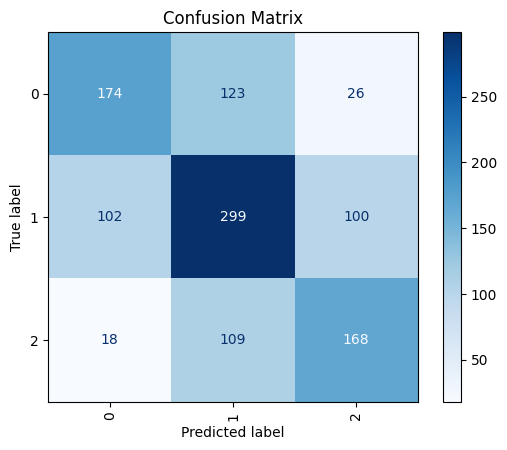

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [70]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.58


In [71]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.57


In [72]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.57
